In [3]:
# DNN: deep neural network
# MLP: multi layered perceptron
import numpy as np
import tensorflow as tf

# tensorflow 2.0에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용 함수
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화

# tensorflow 1.x, Keras가 독립적으로 설치된 경우
# from keras.models import Sequential  # class
# from keras.models import load_model  # model 사용 함수
# from keras.layers import Dense       # class

print(tf.__version__)

2.0.0


In [4]:
# 데이터

# 훈련 데이터: 수
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20])

# 정답 데이터: 배수
y_train = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])

print(x_train)
print(y_train)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]


### 다층퍼셉트론(MLP), 은닉층이 2개 이상 있으면 딥러닝

In [10]:
# 단순 수치 예측할 때, linear와 mse를 사용한다.
model = Sequential()
model.add(Dense(10, input_dim=1, activation='linear')) # 은닉층1
# dense: 전결합층을 은닉층으로 추가
# 10: 출력값의 갯수, input_dim=1: 입력 데이터 갯수,
# activation='linear': 활성화 함수, 선형 회귀 -> ax + b

# 2번째 층부터는 input_dim을 생략 -> 자동으로 처리된다.
model.add(Dense(1, activation='linear')) # 은닉층 2 -> 입력:10 출력:1


# 학습률 지정 안 하면 기본값이 쓰임
model.compile(optimizer='adam', loss='mse')

# epochs: 20, 50, 100, 300, 1000
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs = 100, batch_size=1)
# x_train: 훈련 데이터, y_train: 타깃(실제값), 지도 학습
# validation_split=0.2: 훈련과 검증을 80:20으로 데이터 분할
# shuffle=True: 데이터 무작위 검증
# epochs=30: 전체 데이터 학습 횟수
# batch_size=1: 1건 처리후 가중치 변경
# 30 * (20 / 1) = 600번 가중치 변경
# 30 * (20 / 2) = 300번 가중치 변경
# 30 * (20 / 20) = 30번 가중치 변경

Train on 16 samples, validate on 4 samples
Epoch 1/100
16/16 [==============================] - 0s 19ms/sample - loss: 204.3828 - val_loss: 710.0072
Epoch 2/100
16/16 [==============================] - 0s 2ms/sample - loss: 182.2975 - val_loss: 633.3064
Epoch 3/100
16/16 [==============================] - 0s 2ms/sample - loss: 162.2574 - val_loss: 560.3266
Epoch 4/100
16/16 [==============================] - 0s 2ms/sample - loss: 142.6447 - val_loss: 493.6793
Epoch 5/100
16/16 [==============================] - 0s 2ms/sample - loss: 126.0312 - val_loss: 426.3751
Epoch 6/100
16/16 [==============================] - 0s 2ms/sample - loss: 106.8628 - val_loss: 373.4196
Epoch 7/100
16/16 [==============================] - 0s 2ms/sample - loss: 92.7215 - val_loss: 316.9486
Epoch 8/100
16/16 [==============================] - 0s 2ms/sample - loss: 77.7500 - val_loss: 267.3248
Epoch 9/100
16/16 [==============================] - 0s 2ms/sample - loss: 63.9030 - val_loss: 226.2760
Epoch 10/100
1

16/16 [==============================] - 0s 2ms/sample - loss: 0.1706 - val_loss: 0.3755
Epoch 81/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1679 - val_loss: 0.3557
Epoch 82/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1652 - val_loss: 0.3499
Epoch 83/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1615 - val_loss: 0.3727
Epoch 84/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1613 - val_loss: 0.3726
Epoch 85/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1570 - val_loss: 0.3489
Epoch 86/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1535 - val_loss: 0.3437
Epoch 87/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1516 - val_loss: 0.3718
Epoch 88/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1484 - val_loss: 0.3266
Epoch 89/100
16/16 [==============================] - 0s 2ms/sample - loss: 0.1454 - val_loss: 

In [11]:
model.summary()
# 파라미터 2개 = 가중치1개 + bias 1개

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


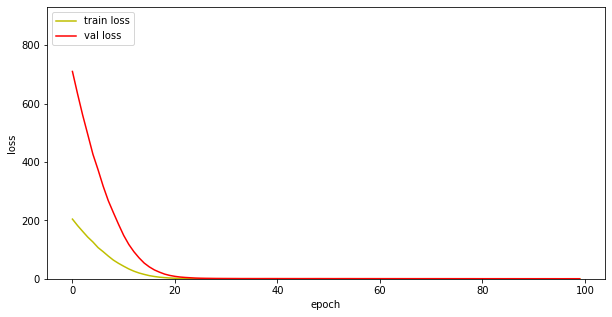

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 930.7184 ]) # 값을 반영하여 변경
# val_loss: 2675.0146 오차들의 합

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# 값이 떨어지면 학습이 되고 있다는 의미

In [13]:
# 학습 결과를 테스트
x = np.array([51, 52, 53, 54, 55])
y = np.array([102, 104, 106, 108, 110]) # 실제답, 비교 목적

pd = model.predict(x) # 모델 사용, 2차원 배열로 예측 결과가 발생
print(pd.shape)
print(pd)

(5, 1)
[[ 99.351906]
 [101.285995]
 [103.22008 ]
 [105.154175]
 [107.08827 ]]


In [14]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.0f}'
    print(fmt.format(x[i], y[i], pd[i][0]))

x: 51, 실제값: 102, 예측값: 99
x: 52, 실제값: 104, 예측값: 101
x: 53, 실제값: 106, 예측값: 103
x: 54, 실제값: 108, 예측값: 105
x: 55, 실제값: 110, 예측값: 107
